# Projeto de Análise de Dados – R. Amaral Office

Grupo: Pedro Regis, Eduardo Barbosa, Murilo Godoy  



## Introdução

A empresa R. Amaral Office atua no fornecimento de móveis, suprimentos e equipamentos para ambientes de trabalho. Com uma base de milhares de pedidos registrados ao longo dos últimos anos, surgiu a oportunidade de usar dados históricos para obter insights valiosos sobre desempenho comercial, lucratividade e comportamento de compra dos clientes.


## Objetivos

### Objetivo geral
Explorar e analisar os dados de vendas da empresa para entender os fatores que mais impactam sua lucratividade.

### Objetivos específicos
- Verificar se um pedido será lucrativo com base nas informações de cliente, produto, desconto, envio, etc.
- Investigar quais produtos, regiões ou segmentos mais contribuem para lucros ou prejuízos.
- Identificar padrões de desconto que levam a prejuízo.
- Oferecer uma base para decisões comerciais como política de preços, frete e escolha de produtos estratégicos.


## Carregamento e inspeção inicial

In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [31]:
df_R_amaral = pd.read_excel('Base de Dados R. Amaral Office.xlsx')
df_R_amaral.head(7)

,id_pedido,nome_cliente,modo_envio,estado,vendas,quantidade,desconto,lucro,segmento,região,...,dia_pedido,dia_semana_pedido,mes_pedido,ano_pedido,dia_envio,mes_envio,ano_envio,data_pedido,mes_ano,tempo_preparacao
0,1,Muhammed MacIntyre,Expresso,Paraná,825.174,9,0.30,-117.8820,Corporativo,Sul,...,4,Domingo,9,2016,6,9,2016,42617,42617,2
1,2,Ruben Dartt,Normal,São Paulo,411.332,4,0.15,-4.8392,Consumidor,Sudeste,...,5,Sexta-feira,9,2014,9,9,2014,41887,41887,4
2,3,Liz Pelletier,Mesmo Dia,São Paulo,411.332,4,0.15,-4.8392,Home Office,Sudeste,...,28,Quinta-feira,11,2013,28,11,2013,41606,41606,0
3,4,Liz Pelletier,Expresso,Amapá,241.960,2,0.00,33.8744,Consumidor,Norte,...,30,Segunda-feira,5,2016,31,5,2016,42520,42520,1
4,5,Liz Pelletier,Normal,Sergipe,341.960,2,0.00,78.6508,Home Office,Nordeste,...,31,Terça-feira,12,2013,7,1,2014,41639,41639,7
5,6,Liz Pelletier,Expresso,Paraná,359.058,3,0.30,-35.9058,Home Office,Sul,...,24,Segunda-feira,3,2014,27,3,2014,41722,41722,3
6,7,Julie Creighton,Mesmo Dia,Rio de Janeiro,136.784,1,0.20,5.1294,Consumidor,Sudeste,...,5,Sexta-feira,6,2015,5,6,2015,42160,42160,0


#### Identificação de problemas:



In [32]:
df_R_amaral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_pedido          9994 non-null   int64  
 1   nome_cliente       9994 non-null   object 
 2   modo_envio         9994 non-null   object 
 3   estado             9994 non-null   object 
 4   vendas             9994 non-null   float64
 5   quantidade         9994 non-null   int64  
 6   desconto           9994 non-null   float64
 7   lucro              9994 non-null   float64
 8   segmento           9994 non-null   object 
 9   região             9994 non-null   object 
 10  subcategoria       9994 non-null   object 
 11  categoria          9994 non-null   object 
 12  dia_pedido         9994 non-null   int64  
 13  dia_semana_pedido  9994 non-null   object 
 14  mes_pedido         9994 non-null   int64  
 15  ano_pedido         9994 non-null   int64  
 16  dia_envio          9994 

In [33]:
quantidade_nans = df_R_amaral.isna().sum()
print(quantidade_nans)



id_pedido            0
nome_cliente         0
modo_envio           0
estado               0
vendas               0
quantidade           0
desconto             0
lucro                0
segmento             0
região               0
subcategoria         0
categoria            0
dia_pedido           0
dia_semana_pedido    0
mes_pedido           0
ano_pedido           0
dia_envio            0
mes_envio            0
ano_envio            0
data_pedido          0
mes_ano              0
tempo_preparacao     0
dtype: int64


In [34]:
dados_duplicados = df_R_amaral.duplicated().sum()
print(dados_duplicados)



0


In [35]:
df_R_amaral.dtypes


id_pedido              int64
nome_cliente          object
modo_envio            object
estado                object
vendas               float64
quantidade             int64
desconto             float64
lucro                float64
segmento              object
região                object
subcategoria          object
categoria             object
dia_pedido             int64
dia_semana_pedido     object
mes_pedido             int64
ano_pedido             int64
dia_envio              int64
mes_envio              int64
ano_envio              int64
data_pedido            int64
mes_ano                int64
tempo_preparacao       int64
dtype: object

#### Limpeza de dados

Como não foram identificados valores nulos ou duplicados, vamos apenas padronizar as categeorias

In [36]:
for coluna in df_R_amaral.select_dtypes(include=["object", "category"]).columns:
    df_R_amaral[coluna] = df_R_amaral[coluna].astype(str).str.strip()

In [37]:
colunas_categoricas = [
    'modo_envio', 'estado', 'segmento', 'região',
    'subcategoria', 'categoria', 'dia_semana_pedido'
]

df_R_amaral[colunas_categoricas] = df_R_amaral[colunas_categoricas].astype('category')

df_R_amaral.dtypes

id_pedido               int64
nome_cliente           object
modo_envio           category
estado               category
vendas                float64
quantidade              int64
desconto              float64
lucro                 float64
segmento             category
região               category
subcategoria         category
categoria            category
dia_pedido              int64
dia_semana_pedido    category
mes_pedido              int64
ano_pedido              int64
dia_envio               int64
mes_envio               int64
ano_envio               int64
data_pedido             int64
mes_ano                 int64
tempo_preparacao        int64
dtype: object

In [38]:
df_R_amaral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id_pedido          9994 non-null   int64   
 1   nome_cliente       9994 non-null   object  
 2   modo_envio         9994 non-null   category
 3   estado             9994 non-null   category
 4   vendas             9994 non-null   float64 
 5   quantidade         9994 non-null   int64   
 6   desconto           9994 non-null   float64 
 7   lucro              9994 non-null   float64 
 8   segmento           9994 non-null   category
 9   região             9994 non-null   category
 10  subcategoria       9994 non-null   category
 11  categoria          9994 non-null   category
 12  dia_pedido         9994 non-null   int64   
 13  dia_semana_pedido  9994 non-null   category
 14  mes_pedido         9994 non-null   int64   
 15  ano_pedido         9994 non-null   int64   
 16  dia_en

## Estatísticas descritivas das variáveis numéricas

In [39]:
colunas_analisar = ['vendas', 'quantidade', 'desconto', 'lucro', 'tempo_preparacao']

for coluna in colunas_analisar:
    print(f"Estatísticas da coluna '{coluna}':")
    print(df_R_amaral[coluna].describe().round(3))
    print('-' * 50)

Estatísticas da coluna 'vendas':
count     9994.000
mean       229.858
std        623.245
min          0.444
25%         17.280
50%         54.490
75%        209.940
max      22638.480
Name: vendas, dtype: float64
--------------------------------------------------
Estatísticas da coluna 'quantidade':
count    9994.000
mean        3.790
std         2.225
min         1.000
25%         2.000
50%         3.000
75%         5.000
max        14.000
Name: quantidade, dtype: float64
--------------------------------------------------
Estatísticas da coluna 'desconto':
count    9994.000
mean        0.156
std         0.206
min         0.000
25%         0.000
50%         0.200
75%         0.200
max         0.800
Name: desconto, dtype: float64
--------------------------------------------------
Estatísticas da coluna 'lucro':
count    9994.000
mean       28.657
std       234.260
min     -6599.978
25%         1.729
50%         8.666
75%        29.364
max      8399.976
Name: lucro, dtype: float64
-----

In [40]:
colunas_analisar = ['vendas', 'quantidade', 'desconto', 'lucro', 'tempo_preparacao']

for coluna in colunas_analisar:
    print(f"Estatísticas da coluna '{coluna}':")
    print(df_R_amaral[coluna].value_counts())
    print('-' * 50)

Estatísticas da coluna 'vendas':
vendas
12.960     56
15.552     39
19.440     39
10.368     36
25.920     36
           ..
4.920       1
1.640       1
19.830      1
39.660      1
235.188     1
Name: count, Length: 5825, dtype: int64
--------------------------------------------------
Estatísticas da coluna 'quantidade':
quantidade
3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: count, dtype: int64
--------------------------------------------------
Estatísticas da coluna 'desconto':
desconto
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64
--------------------------------------------------
Estatísticas da coluna 'lucro':
lucro
 0.0000      65
 6.2208      43
 9.3312      38
 3.6288      32
 5.4432      32
             ..
-20.0904      1
 1.4418  

### Graficos da análise descritiva

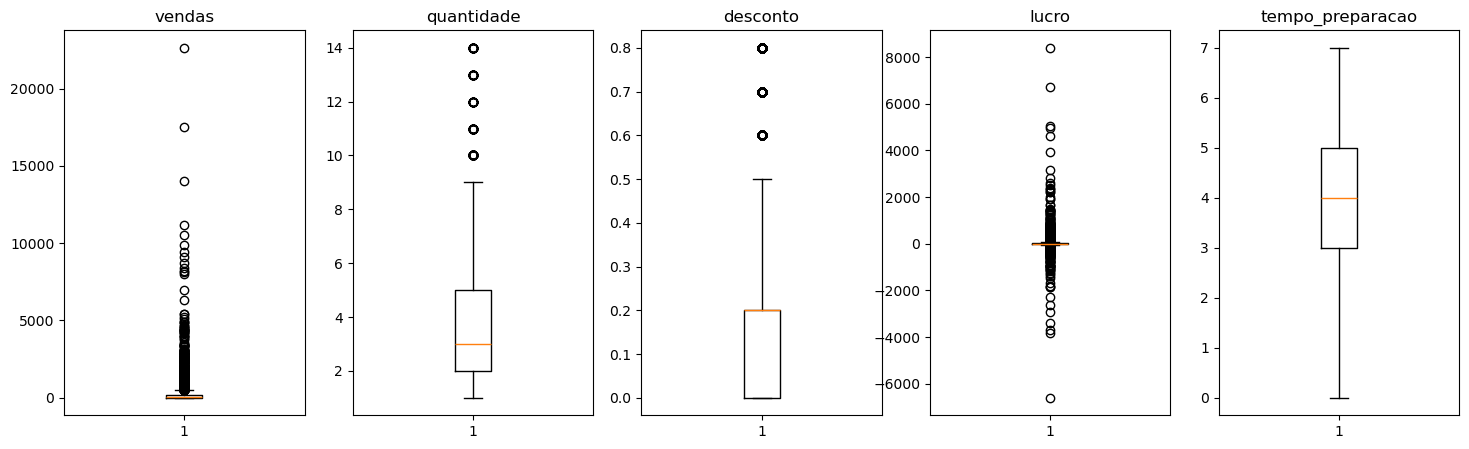

In [41]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 5, 1)
plt.boxplot(df_R_amaral['vendas'])
plt.title('vendas')

plt.subplot(1, 5, 2)
plt.boxplot(df_R_amaral['quantidade'])
plt.title('quantidade')

plt.subplot(1, 5, 3)
plt.boxplot(df_R_amaral['desconto'])
plt.title('desconto')

plt.subplot(1, 5, 4)
plt.boxplot(df_R_amaral['lucro'])
plt.title('lucro')

plt.subplot(1, 5, 5)
plt.boxplot(df_R_amaral['tempo_preparacao'])
plt.title('tempo_preparacao')

plt.show()


Com esses valores, podemos perceber que existem muitos outliers na coluna de vendas e lucro, sendo necessario a remoção deles para uma melhor análise.

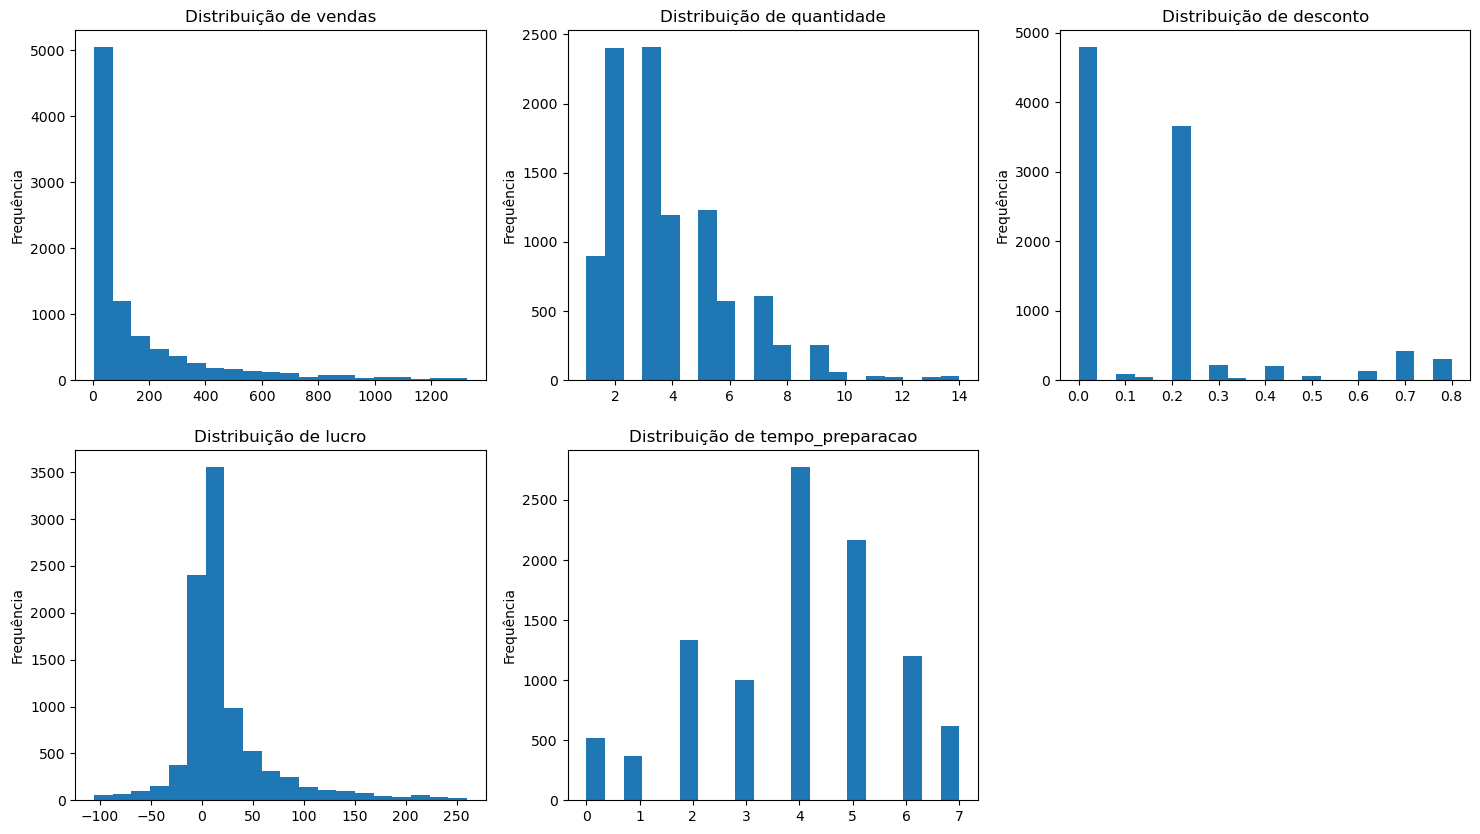

In [42]:
plt.figure(figsize=(18, 10))


p5, p97 = np.percentile(df_R_amaral['vendas'], [5,97])#tirando outliers do grafico para melhor vizualização
plt.subplot(2, 3, 1)
plt.hist(df_R_amaral['vendas'], bins=20,range=[p5,p97])
plt.title('Distribuição de vendas')
plt.ylabel('Frequência')

plt.subplot(2, 3, 2)
plt.hist(df_R_amaral['quantidade'], bins=20)
plt.title('Distribuição de quantidade')
plt.ylabel('Frequência')

plt.subplot(2, 3, 3)
plt.hist(df_R_amaral['desconto'], bins=20)
plt.title('Distribuição de desconto')
plt.ylabel('Frequência')

per3, per97 = np.percentile(df_R_amaral['lucro'], [3,97]) #tirando outliers do grafico para melhor vizualização
plt.subplot(2, 3, 4)
plt.hist(df_R_amaral['lucro'], bins=20,range=[per3,per97])
plt.title('Distribuição de lucro')
plt.ylabel('Frequência')

plt.subplot(2, 3, 5)
plt.hist(df_R_amaral['tempo_preparacao'], bins=20)
plt.title('Distribuição de tempo_preparacao')
plt.ylabel('Frequência')


plt.show()


## Exploração das categorias

In [43]:
for coluna in df_R_amaral.select_dtypes(include="category").columns:
    print(f"Valores únicos da coluna '{coluna}':")
    print(df_R_amaral[coluna].unique())
    print('-' * 50)


Valores únicos da coluna 'modo_envio':
['Expresso', 'Normal', 'Mesmo Dia', 'Econômico']
Categories (4, object): ['Econômico', 'Expresso', 'Mesmo Dia', 'Normal']
--------------------------------------------------
Valores únicos da coluna 'estado':
['Paraná', 'São Paulo', 'Amapá', 'Sergipe', 'Rio de Janeiro', ..., 'Distrito Federal', 'Tocantins', 'Paraíba', 'Rondônia', 'Acre']
Length: 27
Categories (27, object): ['Acre', 'Alagoas', 'Amapá', 'Amazonas', ..., 'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']
--------------------------------------------------
Valores únicos da coluna 'segmento':
['Corporativo', 'Consumidor', 'Home Office']
Categories (3, object): ['Consumidor', 'Corporativo', 'Home Office']
--------------------------------------------------
Valores únicos da coluna 'região':
['Sul', 'Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste']
Categories (5, object): ['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']
--------------------------------------------------
Valores ún

In [44]:
for coluna in df_R_amaral.select_dtypes(include="category").columns:
    print(f"Valores únicos da coluna '{coluna}':")
    print(df_R_amaral[coluna].value_counts())
    print('-' * 50)


Valores únicos da coluna 'modo_envio':
modo_envio
Normal       5968
Econômico    1945
Expresso     1538
Mesmo Dia     543
Name: count, dtype: int64
--------------------------------------------------
Valores únicos da coluna 'estado':
estado
São Paulo              2083
Rio de Janeiro         1128
Minas Gerais            985
Rio Grande do Sul       587
Paraná                  545
Amazonas                506
Pernambuco              469
Bahia                   443
Espírito Santo          368
Goiás                   279
Maranhão                277
Santa Catarina          255
Sergipe                 193
Ceará                   184
Rio Grande do Norte     183
Mato Grosso do Sul      182
Pará                    167
Alagoas                 162
Roraima                 157
Mato Grosso             150
Paraíba                 149
Piauí                   140
Tocantins               124
Rondônia                 80
Distrito Federal         76
Acre                     72
Amapá                    50
Nam

## Graficos da analise categorica

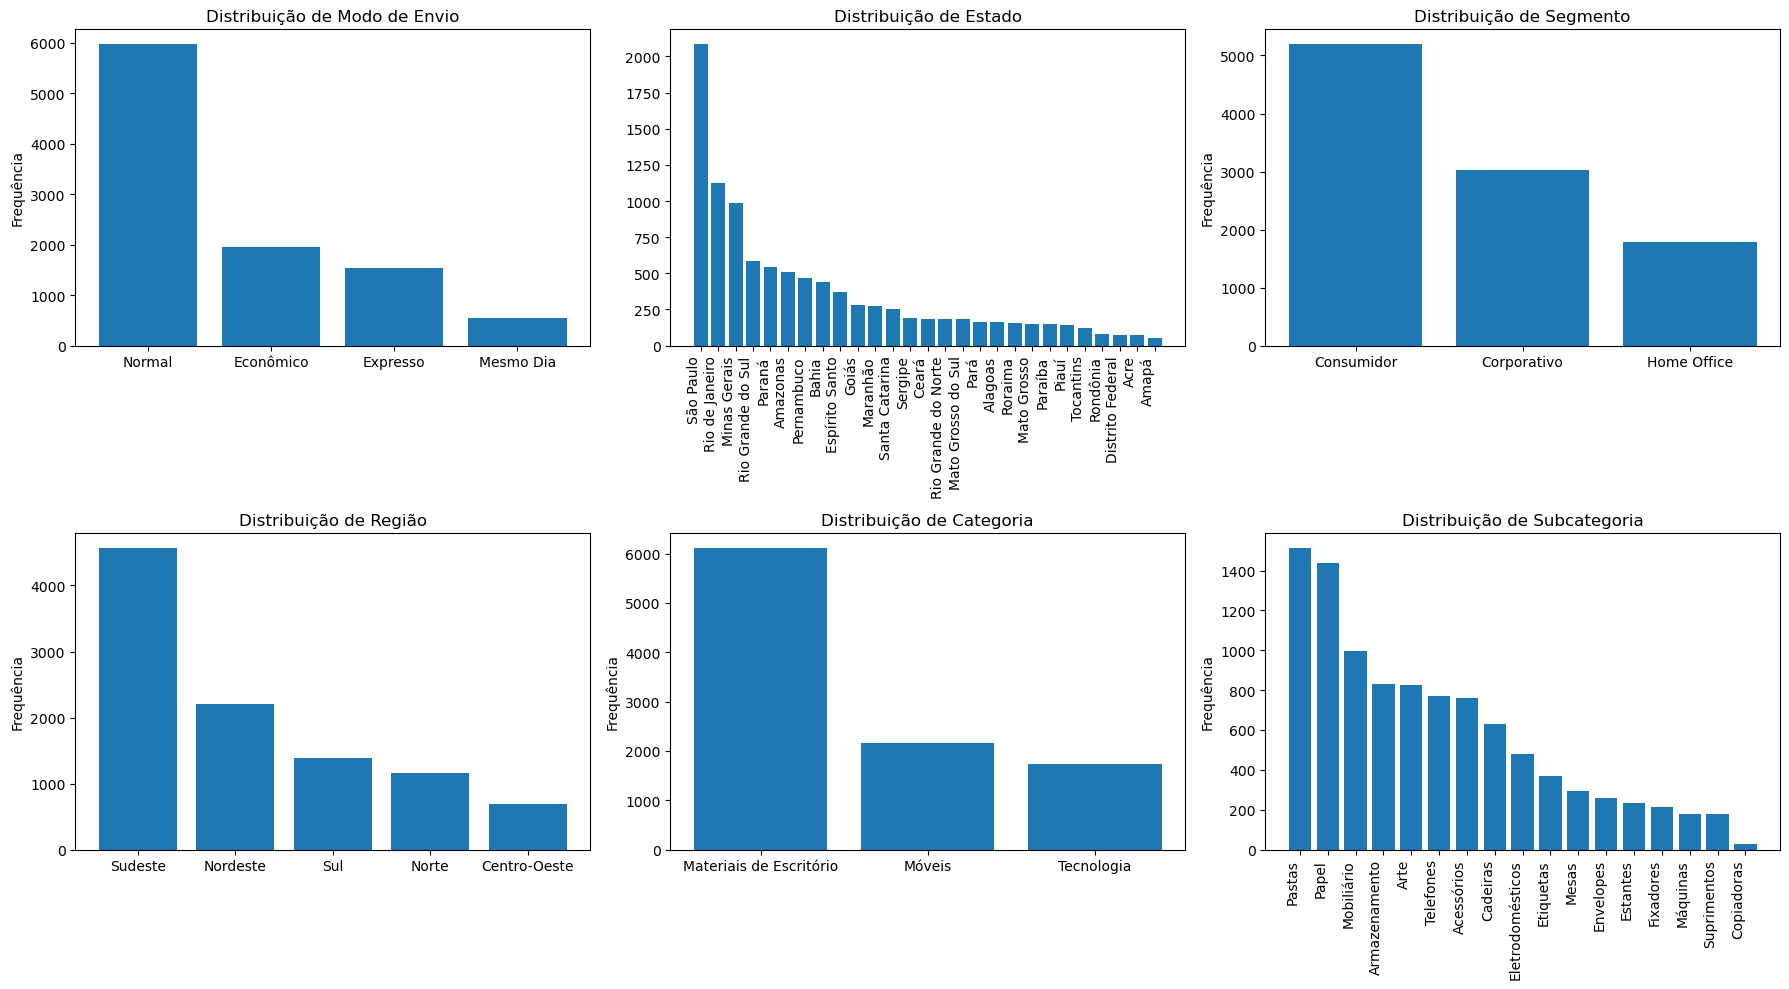

In [45]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
counts = df_R_amaral['modo_envio'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição de Modo de Envio')
plt.ylabel('Frequência')


plt.subplot(2, 3, 2)
counts = df_R_amaral['estado'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição de Estado')
plt.xticks(rotation=90, ha='right')

plt.subplot(2, 3, 3)
counts = df_R_amaral['segmento'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição de Segmento')
plt.ylabel('Frequência')


plt.subplot(2, 3, 4)
counts = df_R_amaral['região'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição de Região')
plt.ylabel('Frequência')


plt.subplot(2, 3, 5)
counts = df_R_amaral['categoria'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição de Categoria')
plt.ylabel('Frequência')

plt.subplot(2, 3, 6)
counts = df_R_amaral['subcategoria'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição de Subcategoria')
plt.ylabel('Frequência')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

## Geração de dummis para verificar correlação entre as colunas

In [46]:
df_R_amaral.head(3)

,id_pedido,nome_cliente,modo_envio,estado,vendas,quantidade,desconto,lucro,segmento,região,...,dia_pedido,dia_semana_pedido,mes_pedido,ano_pedido,dia_envio,mes_envio,ano_envio,data_pedido,mes_ano,tempo_preparacao
0,1,Muhammed MacIntyre,Expresso,Paraná,825.174,9,0.30,-117.8820,Corporativo,Sul,...,4,Domingo,9,2016,6,9,2016,42617,42617,2
1,2,Ruben Dartt,Normal,São Paulo,411.332,4,0.15,-4.8392,Consumidor,Sudeste,...,5,Sexta-feira,9,2014,9,9,2014,41887,41887,4
2,3,Liz Pelletier,Mesmo Dia,São Paulo,411.332,4,0.15,-4.8392,Home Office,Sudeste,...,28,Quinta-feira,11,2013,28,11,2013,41606,41606,0


In [47]:
colunas_relevantes = [
    'modo_envio', 'estado', 'segmento', 'região',
    'categoria', 'subcategoria', 'mes_pedido', 'tempo_preparacao',
    'desconto', 'vendas', 'quantidade', 'lucro'
]
df_corr = df_R_amaral[colunas_relevantes].copy()


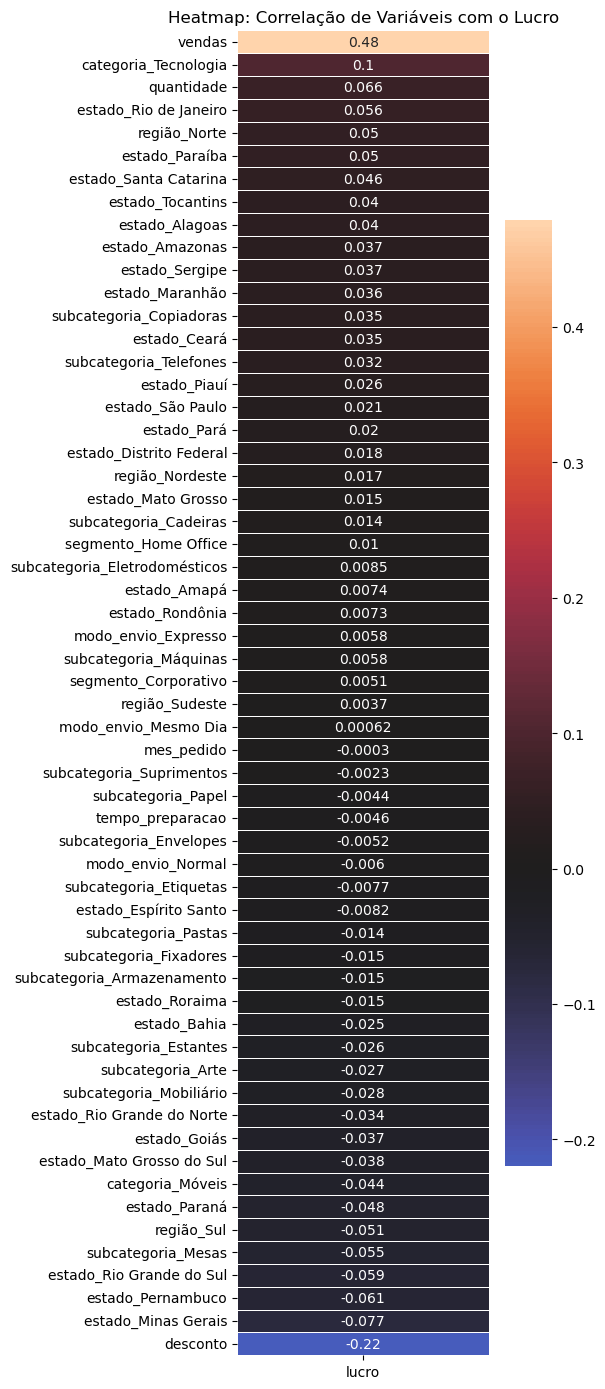

In [48]:

df_dummies = pd.get_dummies(df_corr, drop_first=True, dtype=int)

correlacoes_com_lucro = df_dummies.corr()['lucro'].drop('lucro').sort_values()

plt.figure(figsize=(6, 14))
sns.heatmap(correlacoes_com_lucro.to_frame(), annot=True, center=0, linewidths=0.5,)
plt.title('Heatmap: Correlação de Variáveis com o Lucro')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Dado esse resultado, podemos concluir que as unicas variaveis que realmente influemciam o lucro são as vendas e o desconto, porém outras variaveis podem influenciar nas vendas e no desconto que consequentemente influemciam no lucro.

Portanto, faremos outros heatmaps das vendas e desconto para verificar essa correlação

In [49]:
correlacoes_vendas = df_dummies.corr()['vendas'].drop('vendas').sort_values()
correlacoes_desconto = df_dummies.corr()['desconto'].drop('desconto').sort_values()


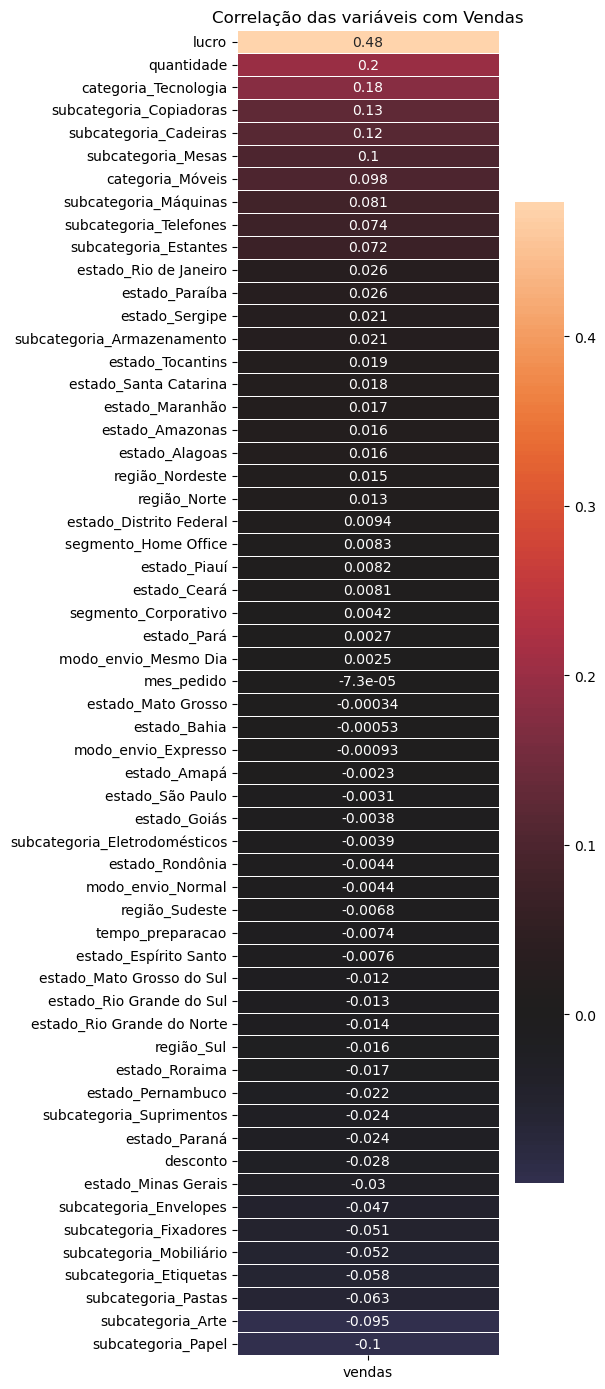

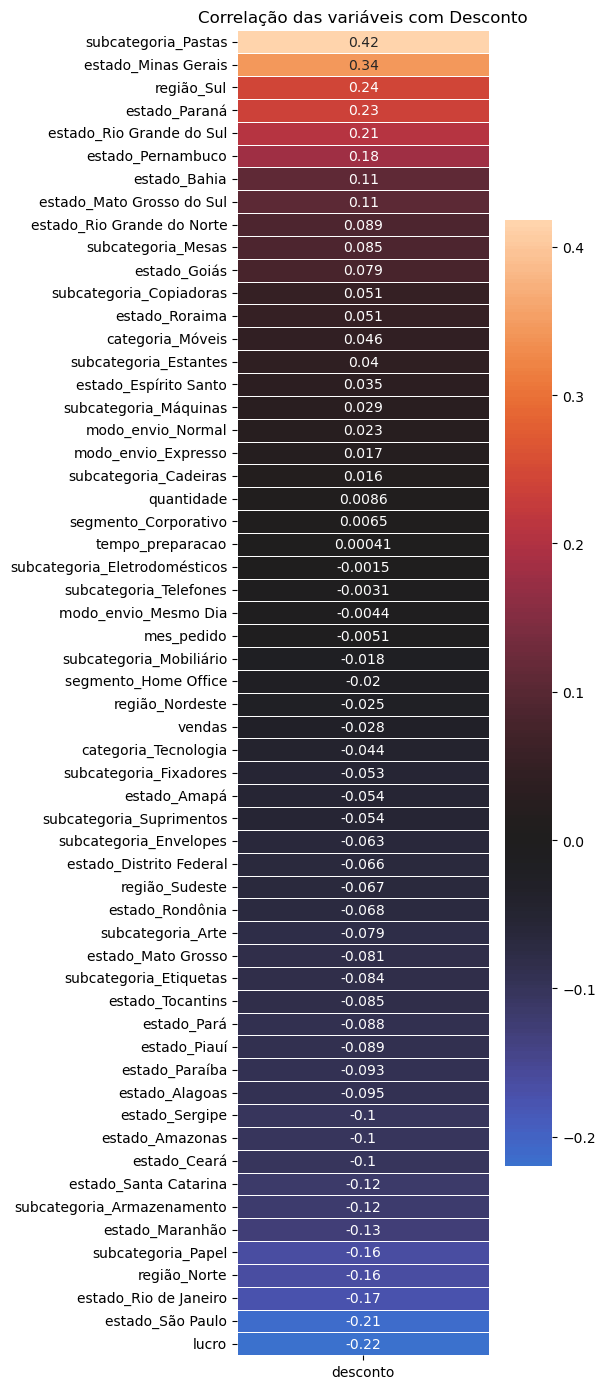

In [50]:
plt.figure(figsize=(6, 14))
sns.heatmap(correlacoes_vendas.to_frame(), annot=True, center=0, linewidths=0.5)
plt.title('Correlação das variáveis com Vendas')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 14))
sns.heatmap(correlacoes_desconto.to_frame(), annot=True, center=0, linewidths=0.5)
plt.title('Correlação das variáveis com Desconto')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



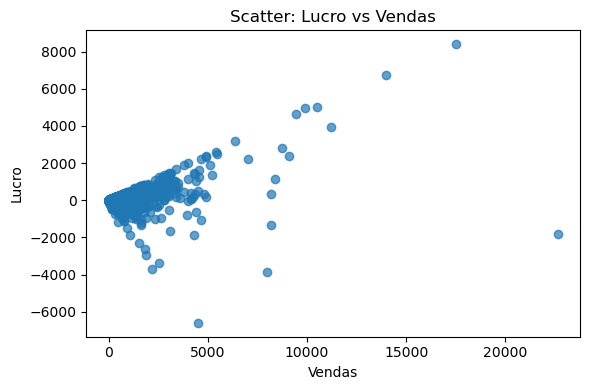

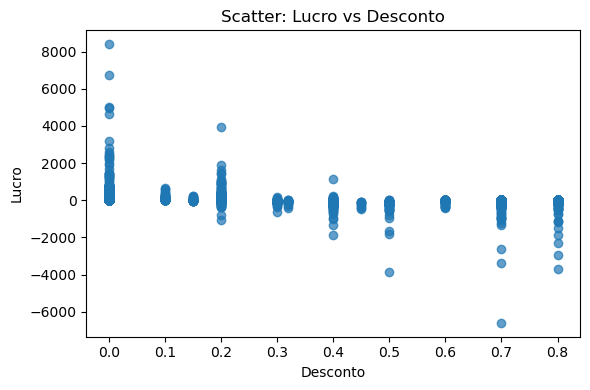

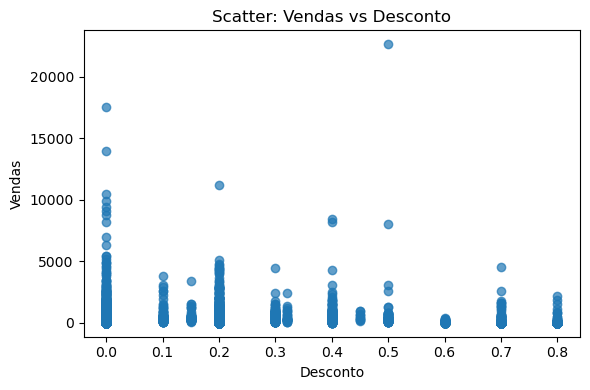

In [51]:
plt.figure(figsize=(6, 4))
plt.scatter(df_R_amaral['vendas'], df_R_amaral['lucro'], alpha=0.7)
plt.xlabel('Vendas')
plt.ylabel('Lucro')
plt.title('Scatter: Lucro vs Vendas')
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
plt.scatter(df_R_amaral['desconto'], df_R_amaral['lucro'], alpha=0.7)
plt.xlabel('Desconto')
plt.ylabel('Lucro')
plt.title('Scatter: Lucro vs Desconto')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(df_R_amaral['desconto'], df_R_amaral['vendas'], alpha=0.7)
plt.xlabel('Desconto')
plt.ylabel('Vendas')
plt.title('Scatter: Vendas vs Desconto')
plt.tight_layout()
plt.show()

## Preparação da base para criar o modelo

In [52]:
df_R_amaral['margem_lucro'] = (df_R_amaral['lucro'] / df_R_amaral['vendas']) * 100


limite = 10  # decidimos colocar como sendo 10%
df_R_amaral['lucro_aceitavel'] = (df_R_amaral['margem_lucro'] > limite).astype(int)


colunas_para_modelo = df_dummies.columns.drop(['lucro']) 

# X = dados de entrada, y é o que queremos prever
X = df_dummies[colunas_para_modelo]
y = df_R_amaral['lucro_aceitavel']

df_R_amaral

,id_pedido,nome_cliente,modo_envio,estado,vendas,quantidade,desconto,lucro,segmento,região,...,mes_pedido,ano_pedido,dia_envio,mes_envio,ano_envio,data_pedido,mes_ano,tempo_preparacao,margem_lucro,lucro_aceitavel
0,1,Muhammed MacIntyre,Expresso,Paraná,825.174,9,0.30,-117.8820,Corporativo,Sul,...,9,2016,6,9,2016,42617,42617,2,-14.285714,0
1,2,Ruben Dartt,Normal,São Paulo,411.332,4,0.15,-4.8392,Consumidor,Sudeste,...,9,2014,9,9,2014,41887,41887,4,-1.176471,0
2,3,Liz Pelletier,Mesmo Dia,São Paulo,411.332,4,0.15,-4.8392,Home Office,Sudeste,...,11,2013,28,11,2013,41606,41606,0,-1.176471,0
3,4,Liz Pelletier,Expresso,Amapá,241.960,2,0.00,33.8744,Consumidor,Norte,...,5,2016,31,5,2016,42520,42520,1,14.000000,1
4,5,Liz Pelletier,Normal,Sergipe,341.960,2,0.00,78.6508,Home Office,Nordeste,...,12,2013,7,1,2014,41639,41639,7,23.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,Max Jones,Expresso,Minas Gerais,1097.544,7,0.20,123.4737,Corporativo,Sudeste,...,12,2015,11,12,2015,42347,42347,2,11.250000,1
9990,9991,Kristina Nunn,Expresso,Mato Grosso,979.950,5,0.00,284.1855,Consumidor,Centro-Oeste,...,12,2016,4,12,2016,42706,42706,2,29.000000,1
9991,9992,Kristina Nunn,Normal,Pernambuco,235.188,2,0.40,-43.1178,Corporativo,Nordeste,...,1,2014,17,1,2014,41651,41651,5,-18.333333,0
9992,9993,Sean Miller,Expresso,Alagoas,391.980,2,0.00,113.6742,Consumidor,Nordeste,...,9,2016,24,9,2016,42635,42635,2,29.000000,1


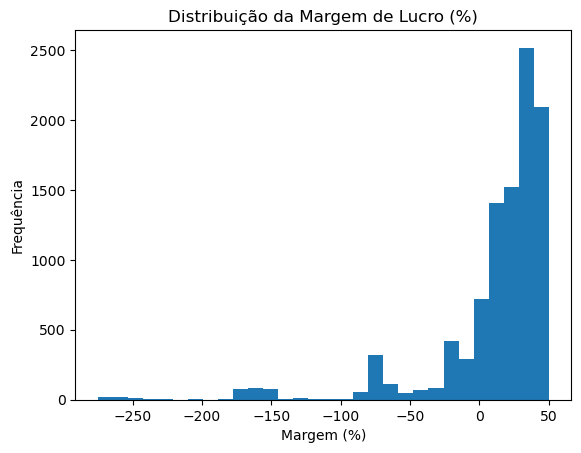

In [53]:
plt.hist(df_R_amaral['margem_lucro'], bins=30)
plt.title('Distribuição da Margem de Lucro (%)')
plt.xlabel('Margem (%)')
plt.ylabel('Frequência')
plt.show()

# Analise RFM


In [61]:
import datetime as dt

file_path = 'Base de Dados R. Amaral Office.xlsx'
df_R_amaral = pd.read_excel(file_path, dtype={'data_pedido': float})

df_R_amaral['data_pedido'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df_R_amaral['data_pedido'], 'D')

data_atual = dt.datetime(2016, 12, 31) #dia que fiz o codigo mas podemos mudar para o dia da apresentacao final do case   

rfm = df_R_amaral.groupby('nome_cliente').agg({
    'data_pedido': lambda x: (data_atual - x.max()).days,
    'id_pedido': 'count',
    'lucro': 'sum'
}).reset_index()

rfm.columns = ['Cliente', 'Recencia', 'Frequencia', 'Monetario']

# Definimos que pegaríamos o top 20% de cada quesito para analisarmos
limiar_monetario = rfm['Monetario'].quantile(0.8)
limiar_recencia = rfm['Recencia'].quantile(0.8)

clientes_prioritarios = rfm[(rfm['Monetario'] >= limiar_monetario) & (rfm['Recencia'] > 120) ] # Filtrando quem mais gastou e está a 4 meses ou mais sem comprar

clientes_prioritarios = clientes_prioritarios.sort_values(by=['Monetario', 'Recencia'], ascending=[False, False])

print("Clientes gastaram bastante, porém e estão há mais tempo sem comprar:")
print(clientes_prioritarios.head(10)) #escolhemos mostrar apenas o top 10 para avaliar se seria bom um atendimento personalizado para entender o que fez com que eles parassem de comprar

Clientes gastaram bastante, porém e estão há mais tempo sem comprar:
              Cliente  Recencia  Frequencia  Monetario
480       Luke Foster       163          12  2913.8393
691        Sean Wendt       386          11  2372.2612
95      Bobby Odegard       231          15  1786.1871
484        Lynn Smith       181          15  1604.3839
629   Ricardo Emerson       132           7  1207.0037
528   Michael Kennedy       135           7   939.9891
191        Dan Lawera       135          12   832.7607
686  Scott Williamson       181           5   793.8304
496      Mark Cousins       136          28   778.5547
438   Kelly Collister       875           3   770.1132
